In [ ]:
import os
import pandas as pd
import numpy as np

from google.colab import drive

import datetime

from tqdm import tqdm

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Navigate to Directory #

drive.mount('/content/drive')

path = "/content/drive/MyDrive/DSO574 - NBA"

os.chdir(path)

Mounted at /content/drive


In [ ]:
import pandas as pd
year2019_2020 = '/content/drive/MyDrive/DSO574 - NBA/2019-2020 NBA Play-By-Play Data.csv'
year2019_2020 = pd.read_csv(year2019_2020)
year2019_2020.head()

,Unnamed: 0,game_id,data_set,date,a1,a2,a3,a4,a5,h1,...,result,steal,type,shot_distance,original_x,original_y,converted_x,converted_y,description,GameFile
0,0,"=""0021900132""",2019-2020 Regular Season,2019-11-10,Will Barton,Paul Millsap,Nikola Jokic,Gary Harris,Jamal Murray,Treveon Graham,...,NaN,NaN,start of period,NaN,NaN,NaN,NaN,NaN,NaN,[2019-11-10]-0021900132-DEN@MIN.csv
1,1,"=""0021900132""",2019-2020 Regular Season,2019-11-10,Will Barton,Paul Millsap,Nikola Jokic,Gary Harris,Jamal Murray,Treveon Graham,...,NaN,NaN,jump ball,NaN,NaN,NaN,NaN,NaN,Jump Ball Towns vs. Jokic: Tip to Covington,[2019-11-10]-0021900132-DEN@MIN.csv
2,2,"=""0021900132""",2019-2020 Regular Season,2019-11-10,Will Barton,Paul Millsap,Nikola Jokic,Gary Harris,Jamal Murray,Treveon Graham,...,made,NaN,unknown,1.0,-8.0,9.0,24.2,88.1,Wiggins 1' Cutting Dunk Shot (2 PTS) (Towns 1 ...,[2019-11-10]-0021900132-DEN@MIN.csv
3,3,"=""0021900132""",2019-2020 Regular Season,2019-11-10,Will Barton,Paul Millsap,Nikola Jokic,Gary Harris,Jamal Murray,Treveon Graham,...,made,NaN,unknown,6.0,60.0,21.0,19.0,7.1,Jokic 6' Driving Floating Bank Jump Shot (2 PT...,[2019-11-10]-0021900132-DEN@MIN.csv
4,4,"=""0021900132""",2019-2020 Regular Season,2019-11-10,Will Barton,Paul Millsap,Nikola Jokic,Gary Harris,Jamal Murray,Treveon Graham,...,missed,NaN,Jump Shot,25.0,-173.0,177.0,7.7,71.3,MISS Graham 25' 3PT Jump Shot,[2019-11-10]-0021900132-DEN@MIN.csv


In [ ]:
players_to_analyze = ['LeBron James', 'Anthony Davis']
# Initialize the new columns
year2019_2020['LB'] = None
year2019_2020['AD'] = None
year2019_2020['PowerPartnership'] = 0  # Initialize with 0

for i in range(len(year2019_2020)):
    for j in range(4, 14):
        player = year2019_2020.iat[i, j]
        if player == 'LeBron James':
            year2019_2020.at[i, 'LB'] = 'LeBron James'
        elif player == 'Anthony Davis':
            year2019_2020.at[i, 'AD'] = 'Anthony Davis'

    # Set PowerPartnership after checking both columns for the same row
    if year2019_2020.at[i, 'LB'] == 'LeBron James' and year2019_2020.at[i, 'AD'] == 'Anthony Davis':
      year2019_2020.at[i, 'PowerPartnership'] = 1

year2019_2020[year2019_2020['PowerPartnership'] == 1]



,Unnamed: 0,game_id,data_set,date,a1,a2,a3,a4,a5,h1,...,shot_distance,original_x,original_y,converted_x,converted_y,description,GameFile,LB,AD,PowerPartnership
11510,0,"=""0021900522""",2019-2020 Regular Season,2020-01-03,Jrue Holiday,Brandon Ingram,Derrick Favors,JJ Redick,Lonzo Ball,LeBron James,...,NaN,NaN,NaN,NaN,NaN,NaN,[2020-01-03]-0021900522-NOP@LAL.csv,LeBron James,Anthony Davis,1
11511,1,"=""0021900522""",2019-2020 Regular Season,2020-01-03,Jrue Holiday,Brandon Ingram,Derrick Favors,JJ Redick,Lonzo Ball,LeBron James,...,NaN,NaN,NaN,NaN,NaN,Jump Ball McGee vs. Favors: Tip to Davis,[2020-01-03]-0021900522-NOP@LAL.csv,LeBron James,Anthony Davis,1
11512,2,"=""0021900522""",2019-2020 Regular Season,2020-01-03,Jrue Holiday,Brandon Ingram,Derrick Favors,JJ Redick,Lonzo Ball,LeBron James,...,2.0,14.0,11.0,26.4,87.9,Davis 2' Cutting Dunk Shot (2 PTS) (James 1 AST),[2020-01-03]-0021900522-NOP@LAL.csv,LeBron James,Anthony Davis,1
11513,3,"=""0021900522""",2019-2020 Regular Season,2020-01-03,Jrue Holiday,Brandon Ingram,Derrick Favors,JJ Redick,Lonzo Ball,LeBron James,...,25.0,114.0,226.0,13.6,27.6,Ball 25' 3PT Jump Shot (3 PTS) (Redick 1 AST),[2020-01-03]-0021900522-NOP@LAL.csv,LeBron James,Anthony Davis,1
11514,4,"=""0021900522""",2019-2020 Regular Season,2020-01-03,Jrue Holiday,Brandon Ingram,Derrick Favors,JJ Redick,Lonzo Ball,LeBron James,...,2.0,-20.0,10.0,23.0,88.0,Davis 2' Alley Oop Layup (4 PTS) (James 2 AST),[2020-01-03]-0021900522-NOP@LAL.csv,LeBron James,Anthony Davis,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535057,510,21900074,2019-2020 Regular Season,11/1/2019,LeBron James,Anthony Davis,Danny Green,Avery Bradley,Alex Caruso,Dorian Finney-Smith,...,NaN,NaN,NaN,NaN,NaN,Kleber REBOUND (Off:3 Def:5),[2019-11-01]-0021900074-LAL@DAL.csv,LeBron James,Anthony Davis,1
535058,511,21900074,2019-2020 Regular Season,11/1/2019,LeBron James,Anthony Davis,Danny Green,Avery Bradley,Alex Caruso,Dorian Finney-Smith,...,2.0,12.0,15.0,26.2,87.5,Doncic 2' Driving Finger Roll Layup (31 PTS),[2019-11-01]-0021900074-LAL@DAL.csv,LeBron James,Anthony Davis,1
535059,512,21900074,2019-2020 Regular Season,11/1/2019,LeBron James,Anthony Davis,Danny Green,Avery Bradley,Alex Caruso,Dorian Finney-Smith,...,NaN,NaN,NaN,NaN,NaN,Hardaway Jr. Personal Take Foul (P1.PN) (S.Wri...,[2019-11-01]-0021900074-LAL@DAL.csv,LeBron James,Anthony Davis,1
535060,513,21900074,2019-2020 Regular Season,11/1/2019,LeBron James,Anthony Davis,Danny Green,Avery Bradley,Alex Caruso,Dorian Finney-Smith,...,NaN,NaN,NaN,NaN,NaN,MISS Green Free Throw 1 of 2,[2019-11-01]-0021900074-LAL@DAL.csv,LeBron James,Anthony Davis,1


In [ ]:
# caluculate the play_length into seconds
year2019_2020['play_length_seconds'] = year2019_2020['play_length'].apply(lambda x: max(0, int(x.split(':')[1]) * 60 + int(x.split(':')[2])))
# Initialize the time
year2019_2020['LB_on_court'] = 0
year2019_2020['AD_on_court'] = 0

# Calculate the time on the court for LeBron James and Anthony Davis
for i, row in year2019_2020.iterrows():
    if 'LeBron James' in row[['a1', 'a2', 'a3', 'a4', 'a5', 'h1', 'h2', 'h3', 'h4', 'h5']].values:
        year2019_2020.at[i, 'LB_on_court'] = row['play_length_seconds']
    if 'Anthony Davis' in row[['a1', 'a2', 'a3', 'a4', 'a5', 'h1', 'h2', 'h3', 'h4', 'h5']].values:
        year2019_2020.at[i, 'AD_on_court'] = row['play_length_seconds']


In [ ]:
# Set two group, PowerPartnership and Solo
year2019_2020_PowerPartnership = year2019_2020[year2019_2020['PowerPartnership']==1]
year2019_2020_Solo = year2019_2020[
    (year2019_2020['PowerPartnership'] == 0) &
    ((year2019_2020['LB'].notnull()) | (year2019_2020['AD'].notnull()))
]

In [ ]:
# caluculate on court time per game of LBJ and AD
year2019_2020_PowerPartnership['LB_on_court_per_game'] = year2019_2020_PowerPartnership.groupby('game_id')['LB_on_court'].transform('sum')
year2019_2020_PowerPartnership['AD_on_court_per_game'] = year2019_2020_PowerPartnership.groupby('game_id')['AD_on_court'].transform('sum')
year2019_2020_Solo['LB_on_court_per_game'] = year2019_2020_Solo.groupby('game_id')['LB_on_court'].transform('sum')
year2019_2020_Solo['AD_on_court_per_game'] = year2019_2020_Solo.groupby('game_id')['AD_on_court'].transform('sum')

# caluculate on court time per game of LBJ and AD in minutes
year2019_2020_PowerPartnership['LB_on_court_per_game'] = year2019_2020_PowerPartnership['LB_on_court_per_game'] / 60
year2019_2020_PowerPartnership['AD_on_court_per_game'] = year2019_2020_PowerPartnership['AD_on_court_per_game'] / 60
year2019_2020_Solo['LB_on_court_per_game'] = year2019_2020_Solo['LB_on_court_per_game'] / 60
year2019_2020_Solo['AD_on_court_per_game'] = year2019_2020_Solo['AD_on_court_per_game'] / 60

In [ ]:
# Filter out Laker's data
lakers_data = year2019_2020[year2019_2020['team'] == 'LAL']

# Group by game_id to calulate the total points each game
lakers_scores = lakers_data.groupby('game_id')['points'].sum().reset_index()

lakers_scores.rename(columns={'points': 'total_points'}, inplace=True)

lakers_scores

,game_id,total_points
0,'0021900659,100.0
1,'0021900667,128.0
2,'0021900684,91.0
3,'0021900726,119.0
4,'0021900736,129.0
...,...,...
87,"=""0021900553""",117.0
88,"=""0021900572""",129.0
89,"=""0021900580""",125.0
90,"=""0021900597""",128.0


In [ ]:
# To see how many points did LBJ and AD get in each game
player_stats = year2019_2020_Solo.groupby(['game_id', 'player']).agg({
    'points': 'sum',
    'LB_on_court_per_game': 'mean',
    'AD_on_court_per_game': 'mean'
    }).reset_index()

player_stats.rename(columns={
    'points': 'total_points',
}, inplace=True)

In [ ]:
player_stats

,game_id,player,individual_total_points,LB_on_court_per_game,AD_on_court_per_game
0,'0021900659,Alex Caruso,2.0,12.683333,6.683333
1,'0021900659,Anthony Davis,2.0,12.683333,6.683333
2,'0021900659,Avery Bradley,2.0,12.683333,6.683333
3,'0021900659,Bobby Portis,3.0,12.683333,6.683333
4,'0021900659,Damyean Dotson,9.0,12.683333,6.683333
...,...,...,...,...,...
1746,"=""0021900633""",Quinn Cook,0.0,35.400000,0.000000
1747,"=""0021900633""",Russell Westbrook,29.0,35.400000,0.000000
1748,"=""0021900633""",Thabo Sefolosha,0.0,35.400000,0.000000
1749,"=""0021900633""",Troy Daniels,0.0,35.400000,0.000000


In [ ]:
# create the pivot table
pivot_player_stats = pd.pivot_table(player_stats, values=['total_points', 'LB_on_court_per_game', 'AD_on_court_per_game'],
                                    index=['game_id'], columns=['player'], fill_value=0)
lebron_anthony_stats = pivot_player_stats.loc[:, (slice(None), ['LeBron James', 'Anthony Davis'])]
non_zero_rows = lebron_anthony_stats[(lebron_anthony_stats != 0).any(axis=1)]
non_zero_rows

,AD_on_court_per_game,LB_on_court_per_game,total_points,AD_on_court_per_game,LB_on_court_per_game,total_points
player,LeBron James,LeBron James,LeBron James,Anthony Davis,Anthony Davis,Anthony Davis
game_id,,,,,,
'0021900659,6.683333,12.683333,9,6.683333,12.683333,2
'0021900667,4.000000,10.716667,10,4.000000,10.716667,6
'0021900684,10.516667,7.016667,7,10.516667,7.016667,14
'0021900726,10.016667,9.233333,2,10.016667,9.233333,12
'0021900736,6.000000,9.766667,5,6.000000,9.766667,2
...,...,...,...,...,...,...
"=""0021900538""",12.983333,10.033333,6,12.983333,10.033333,6
"=""0021900553""",7.783333,11.150000,13,7.783333,11.150000,3


In [ ]:
# calculate LeBron James's total point and total minutes on the court
lebron_total = player_stats[player_stats['player'] == 'LeBron James'].sum()
lebron_total_minutes = lebron_total['LB_on_court_per_game']
lebron_points_per_minute = lebron_total['total_points'] / lebron_total_minutes

# calculate Anthony Davis's total point and total minutes on the court
anthony_total = player_stats[player_stats['player'] == 'Anthony Davis'].sum()
anthony_total_minutes = anthony_total['AD_on_court_per_game']
anthony_points_per_minute = anthony_total['total_points'] / anthony_total_minutes

print(f"LeBron James - Points per minute: {lebron_points_per_minute}")
print(f"Anthony Davis - Points per minute: {anthony_points_per_minute}")

LeBron James - Points per minute: 0.8414270147344481
Anthony Davis - Points per minute: 0.9078154032839103


In [ ]:
lebron_stats_dict = {
    'Points per minute': lebron_points_per_minute,
}

anthony_stats_dict = {
    'Points per minute': anthony_points_per_minute,
}


players_comparison_df = pd.DataFrame({'LeBron James': lebron_stats_dict, 'Anthony Davis': anthony_stats_dict})

players_comparison_df

,LeBron James,Anthony Davis
Points per minute,0.841427,0.907815


In [ ]:
# Caluculate Power Partnership's point earned by each player
player_stats_pp = year2019_2020_PowerPartnership.groupby(['game_id', 'player']).agg({
    'points': 'sum',
    'LB_on_court_per_game': 'mean',
    'AD_on_court_per_game': 'mean'
    }).reset_index()

player_stats_pp.rename(columns={
    'points': 'total_points',
}, inplace=True)

In [ ]:
# pivot table for pp
pivot_player_stats_pp = pd.pivot_table(player_stats_pp, values=['total_points', 'LB_on_court_per_game', 'AD_on_court_per_game'],
                                    index=['game_id'], columns=['player'], fill_value=0)
lebron_anthony_stats_pp = pivot_player_stats_pp.loc[:, (slice(None), ['LeBron James', 'Anthony Davis'])]
non_zero_rows_pp = lebron_anthony_stats_pp[(lebron_anthony_stats_pp != 0).any(axis=1)]
non_zero_rows_pp

,AD_on_court_per_game,LB_on_court_per_game,total_points,AD_on_court_per_game,LB_on_court_per_game,total_points
player,LeBron James,LeBron James,LeBron James,Anthony Davis,Anthony Davis,Anthony Davis
game_id,,,,,,
'0021900659,23.366667,23.366667,12,23.366667,23.366667,26
'0021900667,22.883333,22.883333,17,22.883333,22.883333,10
'0021900684,28.116667,28.116667,22,28.116667,28.116667,17
'0021900726,28.750000,28.750000,20,28.750000,28.750000,25
'0021900736,23.800000,23.800000,10,23.800000,23.800000,19
...,...,...,...,...,...,...
"=""0021900484""",25.566667,25.566667,16,25.566667,25.566667,14
"=""0021900490""",23.483333,23.483333,8,23.483333,23.483333,11


In [ ]:
# calculate LeBron James's total point and total minutes on the court
lebron_total_pp = player_stats_pp[player_stats_pp['player'] == 'LeBron James'].sum()
lebron_total_minutes_pp = lebron_total_pp['LB_on_court_per_game']
lebron_points_per_minute_pp = lebron_total_pp['total_points'] / lebron_total_minutes_pp

# calculate Anthony Davis's total point and total minutes on the court
anthony_total_pp = player_stats_pp[player_stats_pp['player'] == 'Anthony Davis'].sum()
anthony_total_minutes_pp = anthony_total_pp['AD_on_court_per_game']
anthony_points_per_minute_pp = anthony_total_pp['total_points'] / anthony_total_minutes_pp

print(f"LeBron James - Points per minute (pp): {lebron_points_per_minute_pp}")
print(f"Anthony Davis - Points per minute (pp): {anthony_points_per_minute_pp}")


LeBron James - Points per minute (pp): 0.6870757266196533
Anthony Davis - Points per minute (pp): 0.6930073156264417


In [ ]:
lebron_stats_dict_pp = {
    'Points per minute': lebron_points_per_minute_pp,
}

anthony_stats_dict_pp = {
    'Points per minute': anthony_points_per_minute_pp,
}


players_comparison_df_pp = pd.DataFrame({'LeBron James': lebron_stats_dict_pp, 'Anthony Davis': anthony_stats_dict_pp})

players_comparison_df_pp

,LeBron James,Anthony Davis
Points per minute,0.687076,0.693007


In [ ]:
print('Solo:\n', players_comparison_df.to_string(), '\n\n', 'PowerPartnership:\n', players_comparison_df_pp.to_string())

Solo:
                    LeBron James  Anthony Davis
Points per minute      0.841427       0.907815 

 PowerPartnership:
                    LeBron James  Anthony Davis
Points per minute      0.687076       0.693007


In [ ]:
# Calculate points per minute of the team while LeBron James and Anthony Davis are on the court together
lal_points = year2019_2020_PowerPartnership[year2019_2020_PowerPartnership['team'] == 'LAL']['points'].sum()
opponent_points = year2019_2020_PowerPartnership[year2019_2020_PowerPartnership['team'] != 'LAL']['points'].sum()

# Time in each game
total_minutes = year2019_2020_PowerPartnership['play_length_seconds'].sum() / 60

average_lal_points_per_minute_pp = lal_points / total_minutes
average_opponent_points_per_minute_pp = opponent_points / total_minutes

print(f'When LeBron James and Anthony Davis are on the court together, LAL averages {average_lal_points_per_minute_pp:.2f} points and the opponents average {average_opponent_points_per_minute_pp:.2f} points.')

When LeBron James and Anthony Davis are on the court together, LAL averages 2.38 points and the opponents average 2.17 points.


In [ ]:
# Calculate points per minute of the team while LeBron James and Anthony Davis are on the court alone
lal_points = year2019_2020_Solo[(year2019_2020_Solo['team'] == 'LAL') & ((year2019_2020_Solo['LB'] == 'LeBron James') | (year2019_2020_Solo['AD'] == 'Anthony Davis'))]['points'].sum()
opponent_points = year2019_2020_Solo[
    ((year2019_2020_Solo['team'] != 'LAL') &
    ((year2019_2020_Solo['LB'] == 'LeBron James') | (year2019_2020_Solo['AD'] == 'Anthony Davis'))
)]['points'].sum()

# Time in each game
total_minutes = year2019_2020_Solo[
    (year2019_2020_Solo['team'] == 'LAL') |
    ((year2019_2020_Solo['team'] != 'LAL') &
    ((year2019_2020_Solo['LB'] == 'LeBron James') | (year2019_2020_Solo['AD'] == 'Anthony Davis')))
]['play_length_seconds'].sum() / 60

average_lal_points_per_minute = lal_points / total_minutes
average_opponent_points_per_minute = opponent_points / total_minutes

print(f'When LeBron James and Anthony Davis are not on the court together, LAL averages {average_lal_points_per_minute:.2f} points and the opponents average {average_opponent_points_per_minute:.2f} points.')

When LeBron James and Anthony Davis are not on the court together, LAL averages 2.36 points and the opponents average 2.27 points.


In [ ]:
# Find the game play with Lakers
game_id_LAL = year2019_2020_Solo[(~year2019_2020_Solo['team'].isnull()) & (year2019_2020_Solo['team'] == 'LAL')][['game_id']].drop_duplicates()
game_id_LAL_list = game_id_LAL['game_id'].to_list()

In [ ]:
# Calculate points per minute of the team while LeBron James and Anthony Davis aren't on the court alone
lal_points = year2019_2020[(year2019_2020['team'] == 'LAL') &
               (year2019_2020['LB'] != 'LeBron James') & (year2019_2020['AD'] != 'Anthony Davis')]['points'].sum()
opponent_points = year2019_2020[
    ((year2019_2020['team'] != 'LAL') &
    ((year2019_2020['game_id'].isin(game_id_LAL_list))) &
    ((year2019_2020['LB'] != 'LeBron James') & (year2019_2020['AD'] != 'Anthony Davis'))
)]['points'].sum()

# Time in each game
total_minutes = year2019_2020[
    ((year2019_2020['team'] == 'LAL') &
    ((year2019_2020['LB'] != 'LeBron James') & (year2019_2020['AD'] != 'Anthony Davis')))|
    ((year2019_2020['team'] != 'LAL') & (year2019_2020['game_id'].isin(game_id_LAL_list)) &
    ((year2019_2020['LB'] != 'LeBron James') & (year2019_2020['AD'] != 'Anthony Davis')))
]['play_length_seconds'].sum() / 60

average_lal_points_per_minute_ns = lal_points / total_minutes
average_opponent_points_per_minute_ns = opponent_points / total_minutes

print(f'When LeBron James and Anthony Davis are not on the court, LAL averages {average_lal_points_per_minute_ns:.2f} points and the opponents average {average_opponent_points_per_minute_ns:.2f} points.')

When LeBron James and Anthony Davis are not on the court, LAL averages 2.33 points and the opponents average 2.20 points.


In [ ]:
dict_result = {
    'Both on court':{'LAL': average_lal_points_per_minute_pp, 'opponent':average_opponent_points_per_minute_pp},
    'On court alone':{'LAL': average_lal_points_per_minute, 'opponent':average_opponent_points_per_minute},
    'No one on court':{'LAL': average_lal_points_per_minute_ns, 'opponent':average_opponent_points_per_minute_ns}
}

import matplotlib.pyplot as plt

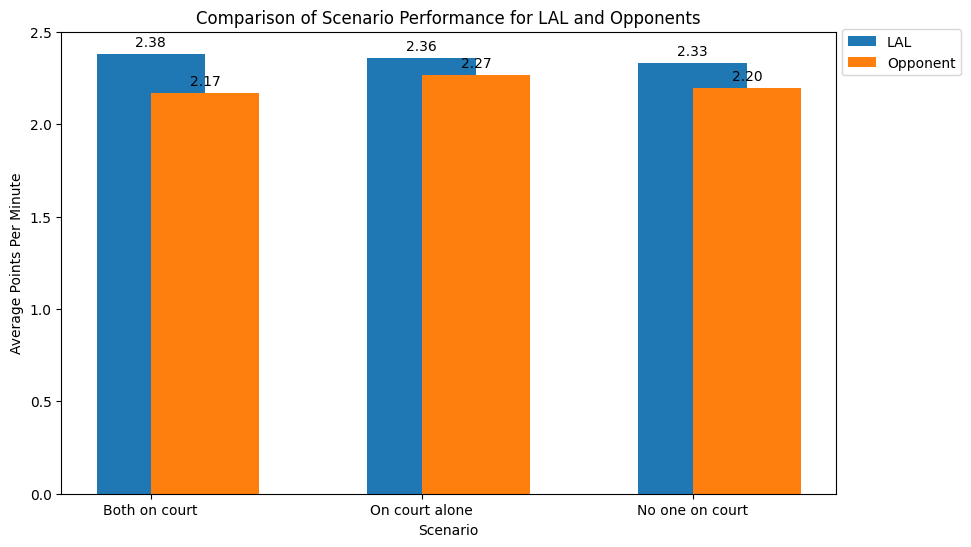

In [ ]:
scenarios = list(dict_result.keys())
teams = ['LAL', 'opponent']

lal_scores = [dict_result[scenario]['LAL'] for scenario in scenarios]
opponent_scores = [dict_result[scenario]['opponent'] for scenario in scenarios]

x = range(len(scenarios))

plt.figure(figsize=(10, 6))
bar1 = plt.bar(x, lal_scores, width=0.4, label='LAL', align='center')
bar2 = plt.bar(x, opponent_scores, width=0.4, label='Opponent', align='edge')

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)


plt.xlabel('Scenario')
plt.ylabel('Average Points Per Minute')
plt.title('Comparison of Scenario Performance for LAL and Opponents')
plt.xticks(x, scenarios)
plt.legend(loc='upper right', bbox_to_anchor=(1.17, 1.02))
plt.show()